In [9]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [10]:
#read the data file
df = pd.read_csv("D:/Data Mining/Data Mining/Practical/districtLevelData_discretized.csv")


#extract the class labels and attributes from the data set
y = df.iloc[:,0]
X = df.iloc[:,1:7] #caution: Python excludes right limit
                   #i.e. we are selecting columns 1 to 6 only 
                   
#extract test and train sets (30% adn 70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [15]:
#fit the decision tree in the training set
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [16]:
#calculate and print the training accuracy
y_predicted = clf.predict(X_train)
confusion_train = pd.crosstab(y_train,y_predicted).to_numpy()
acc_train = confusion_train.trace()/confusion_train.sum()
print('Training accuracy: ',acc_train)

Training accuracy:  0.88


In [17]:
#calculate and print the test accuracy
y_predicted = clf.predict(X_test)
confusion_test = pd.crosstab(y_test,y_predicted).to_numpy()
acc_test = confusion_test.trace()/confusion_test.sum()
print('Test accuracy: ',acc_test)

Test accuracy:  0.92


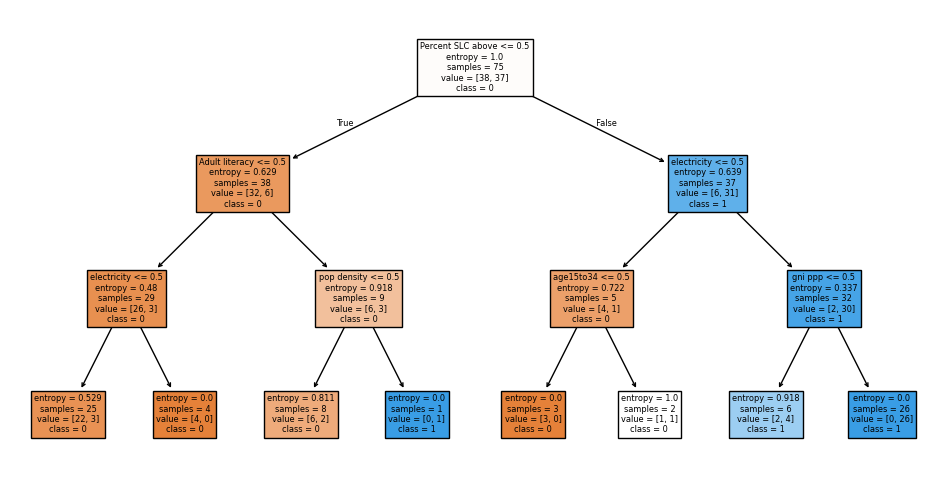

In [18]:
plt.figure(figsize=(12,6))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_.astype(str))
plt.show()

#question find test value for max depth and plot train and test error